In [1]:
import pickle
import gzip
import numpy as np
from PIL import Image
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping, TensorBoard
from keras.utils import to_categorical
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

Using TensorFlow backend.


In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

X_train = training_data[0]
Y_train = training_data[1]
X_val = validation_data[0]
Y_val = validation_data[1]
X_test = test_data[0]
Y_test = test_data[1]

print('MNIST Train Shape', X_train.shape)
print('MNIST Train Target Shape', Y_train.shape)
print('MNIST Validation Shape', X_val.shape)
print('MNIST Validation Target Shape', Y_val.shape)
print('MNIST Test Shape', X_test.shape)
print('MNIST Test Target Shape', Y_test.shape)

## Preprocessing USPS 

USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

USPSMat
UPSPS_f = np.asarray(USPSMat)
UPSPS_target = np.asarray(USPSTar)

print('UPS Feature Data', UPSPS_f.shape)
print('UPS Target Data', UPSPS_target.shape)

MNIST Train Shape (50000, 784)
MNIST Train Target Shape (50000,)
MNIST Validation Shape (10000, 784)
MNIST Validation Target Shape (10000,)
MNIST Test Shape (10000, 784)
MNIST Test Target Shape (10000,)
UPS Feature Data (19999, 784)
UPS Target Data (19999,)


# DNN Node = 256

In [3]:
input_size = 784
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 10

def get_model():
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))

    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()

    model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
validation_data_split = 0.2
num_epochs = 2000
model_batch_size = 256
tb_batch_size = 128
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')


# Process Dataset
processedData = X_train
processedLabel = to_categorical(Y_train, 10)
processedLabel_val = to_categorical(Y_val, 10)
history = model.fit(processedData, processedLabel, validation_data=(X_val, processedLabel_val)
                    , epochs=num_epochs, batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0412 - acc: 0.9888 - val_loss: 0.0682 - val_acc: 0.9811
Epoch 2/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0412 - acc: 0.9890 - val_loss: 0.0681 - val_acc: 0.9809
Epoch 3/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0413 - acc: 0.9891 - val_loss: 0.0679 - val_acc: 0.9812
Epoch 4/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0403 - acc: 0.9891 - val_loss: 0.0677 - val_acc: 0.9813
Epoch 5/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0406 - acc: 0.9892 - val_loss: 0.0675 - val_acc: 0.9811
Epoch 6/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0394 - acc: 0.9891 - val_loss: 0.0676 - val_acc: 0.9814
Epoch 7/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0400 - acc: 0.9892 - val_loss: 0.

50000/50000 [==============================] - 1s 16us/step - loss: 0.0310 - acc: 0.9913 - val_loss: 0.0644 - val_acc: 0.9818
Epoch 118/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0313 - acc: 0.9915 - val_loss: 0.0644 - val_acc: 0.9817
Epoch 119/2000
50000/50000 [==============================] - 1s 18us/step - loss: 0.0309 - acc: 0.9918 - val_loss: 0.0644 - val_acc: 0.9820
Epoch 120/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0313 - acc: 0.9917 - val_loss: 0.0644 - val_acc: 0.9821
Epoch 121/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0312 - acc: 0.9914 - val_loss: 0.0643 - val_acc: 0.9824
Epoch 122/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0319 - acc: 0.9913 - val_loss: 0.0643 - val_acc: 0.9822
Epoch 123/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0320 - acc: 0.9912 - val_loss: 0.0643 - val_acc: 0.9824
Epoch 124/2000
50000/50000 [

50000/50000 [==============================] - 1s 16us/step - loss: 0.0266 - acc: 0.9933 - val_loss: 0.0633 - val_acc: 0.9823
Epoch 234/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0263 - acc: 0.9930 - val_loss: 0.0634 - val_acc: 0.9824
Epoch 235/2000
50000/50000 [==============================] - 1s 15us/step - loss: 0.0262 - acc: 0.9931 - val_loss: 0.0634 - val_acc: 0.9824
Epoch 236/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0264 - acc: 0.9933 - val_loss: 0.0635 - val_acc: 0.9825
Epoch 237/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0260 - acc: 0.9932 - val_loss: 0.0634 - val_acc: 0.9822
Epoch 238/2000
50000/50000 [==============================] - 1s 15us/step - loss: 0.0273 - acc: 0.9927 - val_loss: 0.0633 - val_acc: 0.9823
Epoch 239/2000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0258 - acc: 0.9936 - val_loss: 0.0633 - val_acc: 0.9827
Epoch 240/2000
50000/50000 [

50000/50000 [==============================] - 1s 12us/step - loss: 0.0219 - acc: 0.9944 - val_loss: 0.0627 - val_acc: 0.9825
Epoch 350/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0231 - acc: 0.9944 - val_loss: 0.0626 - val_acc: 0.9824
Epoch 351/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0223 - acc: 0.9946 - val_loss: 0.0627 - val_acc: 0.9826
Epoch 352/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0226 - acc: 0.9942 - val_loss: 0.0627 - val_acc: 0.9825
Epoch 353/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0231 - acc: 0.9947 - val_loss: 0.0627 - val_acc: 0.9825
Epoch 354/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0221 - acc: 0.9944 - val_loss: 0.0625 - val_acc: 0.9823
Epoch 355/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0237 - acc: 0.9940 - val_loss: 0.0625 - val_acc: 0.9826
Epoch 356/2000
50000/50000 [

50000/50000 [==============================] - 1s 12us/step - loss: 0.0201 - acc: 0.9951 - val_loss: 0.0624 - val_acc: 0.9828
Epoch 466/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0198 - acc: 0.9949 - val_loss: 0.0624 - val_acc: 0.9830
Epoch 467/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0201 - acc: 0.9950 - val_loss: 0.0623 - val_acc: 0.9829
Epoch 468/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0200 - acc: 0.9951 - val_loss: 0.0623 - val_acc: 0.9831
Epoch 469/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0206 - acc: 0.9949 - val_loss: 0.0623 - val_acc: 0.9829
Epoch 470/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0195 - acc: 0.9955 - val_loss: 0.0623 - val_acc: 0.9830
Epoch 471/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0201 - acc: 0.9953 - val_loss: 0.0623 - val_acc: 0.9830
Epoch 472/2000
50000/50000 [

50000/50000 [==============================] - 1s 12us/step - loss: 0.0175 - acc: 0.9959 - val_loss: 0.0623 - val_acc: 0.9826
Epoch 582/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0180 - acc: 0.9956 - val_loss: 0.0622 - val_acc: 0.9827
Epoch 583/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0177 - acc: 0.9957 - val_loss: 0.0624 - val_acc: 0.9827
Epoch 584/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0176 - acc: 0.9955 - val_loss: 0.0623 - val_acc: 0.9827
Epoch 585/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0174 - acc: 0.9961 - val_loss: 0.0623 - val_acc: 0.9828
Epoch 586/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0183 - acc: 0.9955 - val_loss: 0.0623 - val_acc: 0.9830
Epoch 587/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0180 - acc: 0.9957 - val_loss: 0.0623 - val_acc: 0.9831
Epoch 588/2000
50000/50000 [

50000/50000 [==============================] - 1s 12us/step - loss: 0.0162 - acc: 0.9963 - val_loss: 0.0622 - val_acc: 0.9831
Epoch 698/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0170 - acc: 0.9957 - val_loss: 0.0621 - val_acc: 0.9831
Epoch 699/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0161 - acc: 0.9964 - val_loss: 0.0622 - val_acc: 0.9831
Epoch 700/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0160 - acc: 0.9961 - val_loss: 0.0622 - val_acc: 0.9829
Epoch 701/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0161 - acc: 0.9965 - val_loss: 0.0623 - val_acc: 0.9827
Epoch 702/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0161 - acc: 0.9963 - val_loss: 0.0623 - val_acc: 0.9828
Epoch 703/2000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0167 - acc: 0.9960 - val_loss: 0.0623 - val_acc: 0.9828
Epoch 704/2000
50000/50000 [

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b6dff35d160>,
      dtype=object)

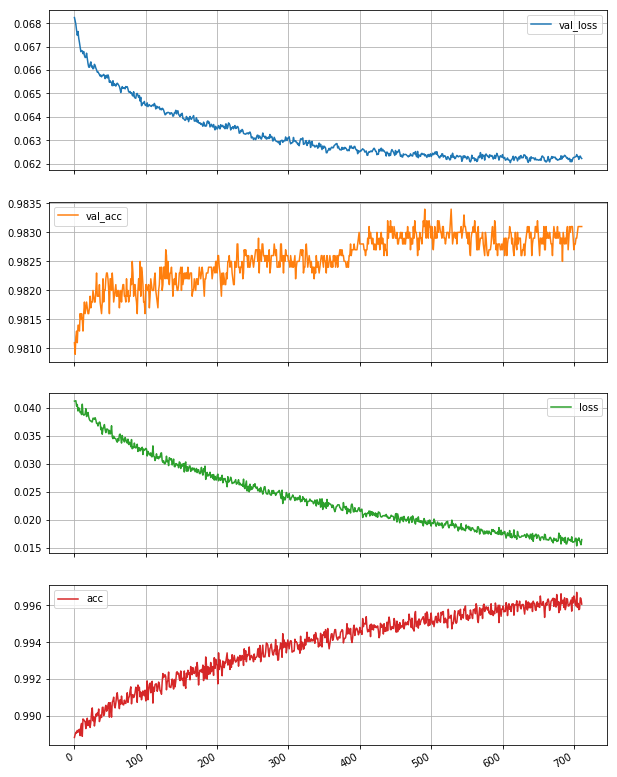

In [7]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [8]:
processedLabel = to_categorical(Y_val, 10)
score = model.evaluate(X_val, processedLabel, verbose=0)
print('Test accuracy for Validation:', score[1])

Test accuracy for Validation: 0.9831


In [9]:
processedLabel = to_categorical(Y_test, 10)
score = model.evaluate(X_test, processedLabel, verbose=0)
print('Test accuracy for Test:', score[1])

Test accuracy for Test: 0.9817


In [10]:
processedLabel = to_categorical(UPSPS_target, 10)
score = model.evaluate(UPSPS_f, processedLabel, verbose=0)
print('Test accuracy for UPSPS:', score[1])

Test accuracy for UPSPS: 0.5009750487405161


In [11]:
Y_train_pred = model.predict(X_train, verbose = 0)
Y_test_pred = model.predict(X_test, verbose = 0)
Y_val_pred = model.predict(X_val, verbose = 0)
UPSPS_pred = model.predict(UPSPS_f, verbose = 0)

In [12]:
Y_test_pred1 = Y_test_pred.argmax(1)
Y_train_pred = Y_train_pred.argmax(1)
Y_val_pred = Y_val_pred.argmax(1)
UPSPS_pred = UPSPS_pred.argmax(1)

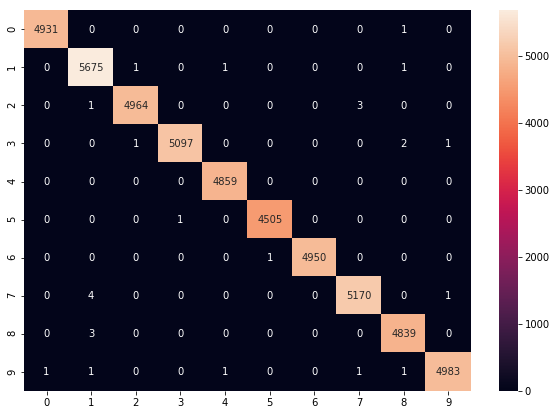

In [13]:
cm=metrics.confusion_matrix(Y_train, Y_train_pred)

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

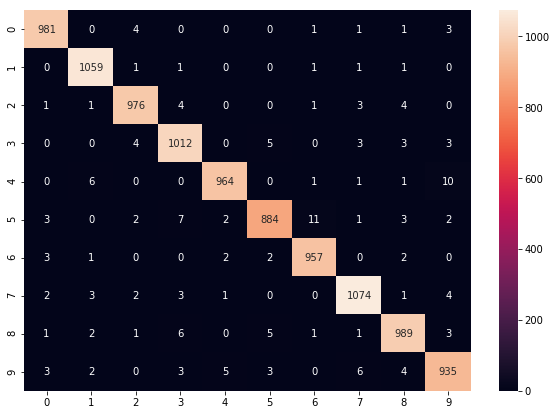

In [14]:
cm=metrics.confusion_matrix(Y_val, Y_val_pred)

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

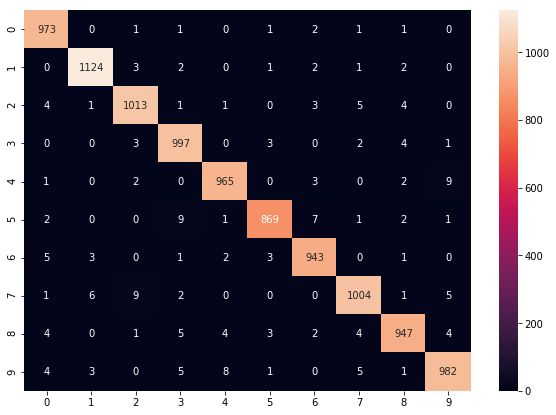

In [15]:
cm=metrics.confusion_matrix(Y_test, Y_test_pred1)

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

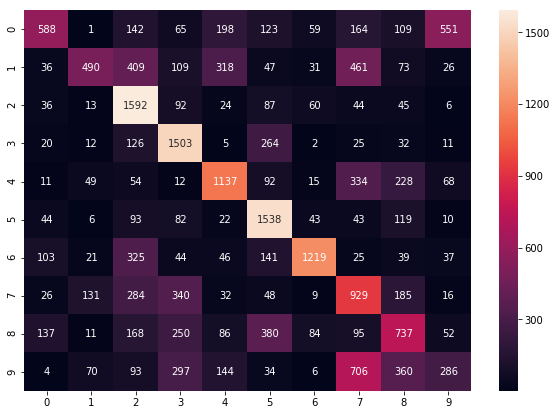

In [16]:
cm=metrics.confusion_matrix(UPSPS_target, UPSPS_pred)

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [17]:
np.savetxt('DNN_MNIST_Train.csv',Y_train_pred, delimiter=",")
np.savetxt('DNN_MNIST_Test.csv',Y_test_pred1, delimiter=",")
np.savetxt('DNN_MNIST_Val.csv',Y_val_pred, delimiter=",")
np.savetxt('DNN_MNIST_UPSPS.csv',UPSPS_pred, delimiter=",")

# DNN Node = 512

In [18]:
first_dense_layer_nodes  = 512
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
validation_data_split = 0.2
num_epochs = 1000
model_batch_size = 256
tb_batch_size = 128
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')


# Process Dataset
processedData = X_train
processedLabel = to_categorical(Y_train, 10)
processedLabel_val = to_categorical(Y_val, 10)
history = model.fit(processedData, processedLabel, validation_data=(X_val, processedLabel_val)
                    , epochs=num_epochs, batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 1s 14us/step - loss: 1.5947 - acc: 0.5920 - val_loss: 1.0150 - val_acc: 0.8316
Epoch 2/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.8708 - acc: 0.8096 - val_loss: 0.6534 - val_acc: 0.8721
Epoch 3/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.6530 - acc: 0.8439 - val_loss: 0.5211 - val_acc: 0.8843
Epoch 4/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.5567 - acc: 0.8590 - val_loss: 0.4526 - val_acc: 0.8960
Epoch 5/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.4990 - acc: 0.8686 - val_loss: 0.4111 - val_acc: 0.9017
Epoch 6/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.4616 - acc: 0.8754 - val_loss: 0.3830 - val_acc: 0.9065
Epoch 7/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.4353 - acc: 0.8824 - val_loss: 0.

50000/50000 [==============================] - 1s 12us/step - loss: 0.1325 - acc: 0.9635 - val_loss: 0.1274 - val_acc: 0.9657
Epoch 118/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.1321 - acc: 0.9633 - val_loss: 0.1269 - val_acc: 0.9663
Epoch 119/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.1307 - acc: 0.9637 - val_loss: 0.1265 - val_acc: 0.9664
Epoch 120/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.1302 - acc: 0.9645 - val_loss: 0.1258 - val_acc: 0.9666
Epoch 121/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.1287 - acc: 0.9636 - val_loss: 0.1254 - val_acc: 0.9668
Epoch 122/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.1280 - acc: 0.9640 - val_loss: 0.1248 - val_acc: 0.9665
Epoch 123/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.1279 - acc: 0.9642 - val_loss: 0.1243 - val_acc: 0.9672
Epoch 124/1000
50000/50000 [

50000/50000 [==============================] - 1s 16us/step - loss: 0.0817 - acc: 0.9771 - val_loss: 0.0930 - val_acc: 0.9735
Epoch 234/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0814 - acc: 0.9780 - val_loss: 0.0928 - val_acc: 0.9732
Epoch 235/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0806 - acc: 0.9779 - val_loss: 0.0926 - val_acc: 0.9732
Epoch 236/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0809 - acc: 0.9780 - val_loss: 0.0925 - val_acc: 0.9740
Epoch 237/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0806 - acc: 0.9775 - val_loss: 0.0923 - val_acc: 0.9740
Epoch 238/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0800 - acc: 0.9784 - val_loss: 0.0921 - val_acc: 0.9738
Epoch 239/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0798 - acc: 0.9782 - val_loss: 0.0920 - val_acc: 0.9736
Epoch 240/1000
50000/50000 [

50000/50000 [==============================] - 1s 16us/step - loss: 0.0589 - acc: 0.9848 - val_loss: 0.0792 - val_acc: 0.9774
Epoch 350/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0579 - acc: 0.9850 - val_loss: 0.0791 - val_acc: 0.9778
Epoch 351/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0581 - acc: 0.9842 - val_loss: 0.0791 - val_acc: 0.9775
Epoch 352/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0574 - acc: 0.9842 - val_loss: 0.0791 - val_acc: 0.9773
Epoch 353/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0579 - acc: 0.9844 - val_loss: 0.0791 - val_acc: 0.9774
Epoch 354/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0581 - acc: 0.9842 - val_loss: 0.0790 - val_acc: 0.9772
Epoch 355/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0578 - acc: 0.9849 - val_loss: 0.0789 - val_acc: 0.9779
Epoch 356/1000
50000/50000 [

50000/50000 [==============================] - 1s 16us/step - loss: 0.0450 - acc: 0.9879 - val_loss: 0.0724 - val_acc: 0.9786
Epoch 466/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0442 - acc: 0.9884 - val_loss: 0.0724 - val_acc: 0.9787
Epoch 467/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0453 - acc: 0.9880 - val_loss: 0.0723 - val_acc: 0.9787
Epoch 468/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0445 - acc: 0.9888 - val_loss: 0.0723 - val_acc: 0.9789
Epoch 469/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0442 - acc: 0.9889 - val_loss: 0.0722 - val_acc: 0.9786
Epoch 470/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0445 - acc: 0.9884 - val_loss: 0.0722 - val_acc: 0.9787
Epoch 471/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0443 - acc: 0.9881 - val_loss: 0.0721 - val_acc: 0.9790
Epoch 472/1000
50000/50000 [

50000/50000 [==============================] - 1s 16us/step - loss: 0.0365 - acc: 0.9908 - val_loss: 0.0686 - val_acc: 0.9795
Epoch 582/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0362 - acc: 0.9907 - val_loss: 0.0686 - val_acc: 0.9796
Epoch 583/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0363 - acc: 0.9910 - val_loss: 0.0687 - val_acc: 0.9797
Epoch 584/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0357 - acc: 0.9910 - val_loss: 0.0686 - val_acc: 0.9796
Epoch 585/1000
50000/50000 [==============================] - 1s 15us/step - loss: 0.0349 - acc: 0.9915 - val_loss: 0.0686 - val_acc: 0.9797
Epoch 586/1000
50000/50000 [==============================] - 1s 13us/step - loss: 0.0354 - acc: 0.9913 - val_loss: 0.0684 - val_acc: 0.9796
Epoch 587/1000
50000/50000 [==============================] - 1s 13us/step - loss: 0.0357 - acc: 0.9912 - val_loss: 0.0684 - val_acc: 0.9795
Epoch 588/1000
50000/50000 [

50000/50000 [==============================] - 1s 12us/step - loss: 0.0290 - acc: 0.9932 - val_loss: 0.0661 - val_acc: 0.9801
Epoch 698/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0293 - acc: 0.9933 - val_loss: 0.0661 - val_acc: 0.9801
Epoch 699/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0300 - acc: 0.9926 - val_loss: 0.0661 - val_acc: 0.9803
Epoch 700/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0296 - acc: 0.9929 - val_loss: 0.0661 - val_acc: 0.9802
Epoch 701/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0295 - acc: 0.9928 - val_loss: 0.0661 - val_acc: 0.9803
Epoch 702/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0296 - acc: 0.9928 - val_loss: 0.0660 - val_acc: 0.9802
Epoch 703/1000
50000/50000 [==============================] - 1s 12us/step - loss: 0.0293 - acc: 0.9928 - val_loss: 0.0660 - val_acc: 0.9804
Epoch 704/1000
50000/50000 [

50000/50000 [==============================] - 1s 16us/step - loss: 0.0243 - acc: 0.9945 - val_loss: 0.0643 - val_acc: 0.9808
Epoch 814/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0239 - acc: 0.9946 - val_loss: 0.0644 - val_acc: 0.9811
Epoch 815/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0243 - acc: 0.9944 - val_loss: 0.0643 - val_acc: 0.9810
Epoch 816/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0246 - acc: 0.9940 - val_loss: 0.0644 - val_acc: 0.9810
Epoch 817/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0245 - acc: 0.9949 - val_loss: 0.0643 - val_acc: 0.9811
Epoch 818/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0241 - acc: 0.9947 - val_loss: 0.0643 - val_acc: 0.9810
Epoch 819/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0241 - acc: 0.9945 - val_loss: 0.0644 - val_acc: 0.9807
Epoch 820/1000
50000/50000 [

50000/50000 [==============================] - 1s 16us/step - loss: 0.0212 - acc: 0.9955 - val_loss: 0.0634 - val_acc: 0.9810
Epoch 930/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0210 - acc: 0.9955 - val_loss: 0.0635 - val_acc: 0.9813
Epoch 931/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0203 - acc: 0.9957 - val_loss: 0.0635 - val_acc: 0.9811
Epoch 932/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0209 - acc: 0.9955 - val_loss: 0.0634 - val_acc: 0.9811
Epoch 933/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0211 - acc: 0.9953 - val_loss: 0.0636 - val_acc: 0.9811
Epoch 934/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0208 - acc: 0.9955 - val_loss: 0.0635 - val_acc: 0.9809
Epoch 935/1000
50000/50000 [==============================] - 1s 16us/step - loss: 0.0206 - acc: 0.9956 - val_loss: 0.0635 - val_acc: 0.9810
Epoch 936/1000
50000/50000 [

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b6e0e36c208>,
      dtype=object)

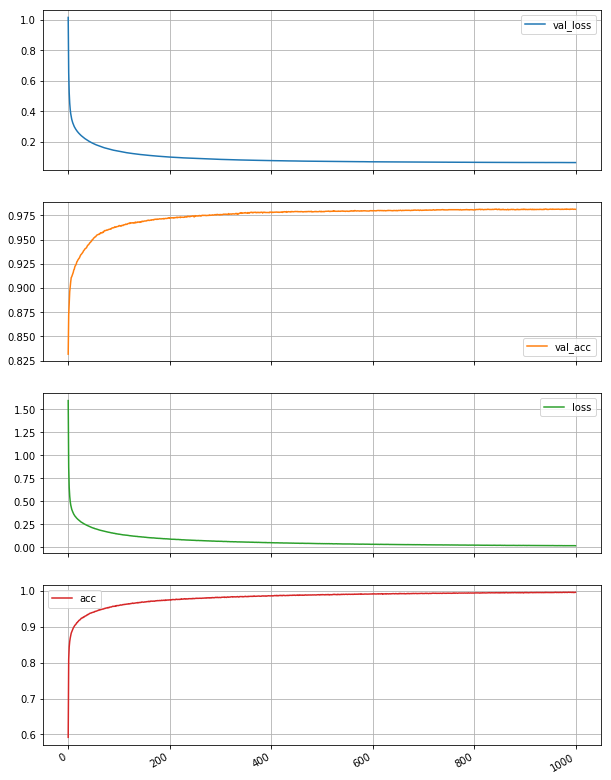

In [20]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [22]:
processedLabel = to_categorical(Y_val, 10)
score = model.evaluate(X_val, processedLabel, verbose=0)
print('Test accuracy for Validation:', score[1])

processedLabel = to_categorical(Y_test, 10)
score = model.evaluate(X_test, processedLabel, verbose=0)
print('Test accuracy for Test:', score[1])

processedLabel = to_categorical(UPSPS_target, 10)
score = model.evaluate(UPSPS_f, processedLabel, verbose=0)
print('Test accuracy for UPSPS:', score[1])

Test accuracy for Validation: 0.9812
Test accuracy for Test: 0.9822
Test accuracy for UPSPS: 0.49047452371575495


# CNN

In [3]:
input_size = 784
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 10

X_train = X_train.reshape(50000, 28, 28, 1)     
Y_train = to_categorical(Y_train, second_dense_layer_nodes)   
def get_model():
    
    model = Sequential()
    
    model.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
    model.add(Activation('relu')) 
    model.add(Convolution2D(32, (3, 3)))  
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2))) 

    model.add(Dropout(drop_out))
    
    model.add(Flatten())
  
    model.add(Dense(first_dense_layer_nodes)) 
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()

    model.compile(optimizer='adadelta', loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [4]:
epochs = 12
batch_size = 128

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
    validation_split = 0.1, verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/12
45000/45000 [==============================] - 1473s 33ms/step - loss: 0.2872 - acc: 0.9103 - val_loss: 0.0843 - val_acc: 0.9746
Epoch 2/12
45000/45000 [==============================] - 1543s 34ms/step - loss: 0.0880 - acc: 0.9731 - val_loss: 0.0665 - val_acc: 0.9798
Epoch 3/12
45000/45000 [==============================] - 1509s 34ms/step - loss: 0.0628 - acc: 0.9803 - val_loss: 0.0559 - val_acc: 0.9832
Epoch 4/12
45000/45000 [==============================] - 1403s 31ms/step - loss: 0.0510 - acc: 0.9842 - val_loss: 0.0640 - val_acc: 0.9804
Epoch 5/12
45000/45000 [==============================] - 3206s 71ms/step - loss: 0.0412 - acc: 0.9874 - val_loss: 0.0468 - val_acc: 0.9850
Epoch 6/12
45000/45000 [==============================] - 1464s 33ms/step - loss: 0.0355 - acc: 0.9884 - val_loss: 0.0545 - val_acc: 0.9842
Epoch 7/12
45000/45000 [==============================] - 1365s 30ms/step - loss: 0.0321 - acc: 0.9899 - val_lo

'\nhistory = model.fit(X_train, Y_train, validation_split=validation_data_split\n                    , epochs=num_epochs, batch_size=model_batch_size, verbose=1)\n                    #, callbacks = [tensorboard_cb,earlystopping_cb])'

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb3226e7b8>,
      dtype=object)

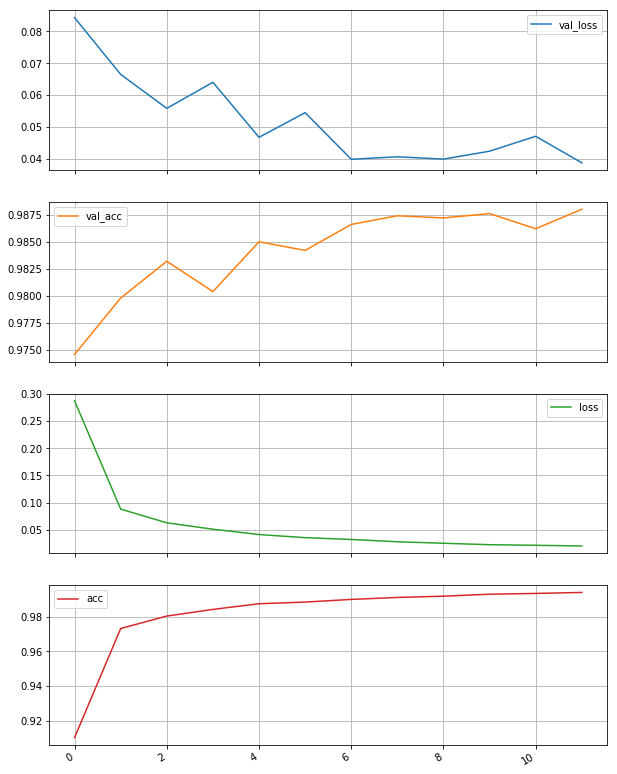

In [5]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [74]:
score = model.evaluate(X_train, Y_train, verbose=1)
print('Test accuracy:', score[1]) 

50000/50000 [==============================] - 483s 10ms/step
Test accuracy: 0.99758


In [75]:
X_test1 = X_test.reshape(10000, 28, 28, 1)
Y_test1 = to_categorical(Y_test, second_dense_layer_nodes)

score = model.evaluate(X_test1, Y_test1, verbose=1)
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 97s 10ms/step
Test accuracy: 0.992


In [76]:
X_val1 = X_val.reshape(10000, 28, 28, 1)
Y_val1 = to_categorical(Y_val, second_dense_layer_nodes)

score = model.evaluate(X_val1, Y_val1, verbose=1)
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 96s 10ms/step
Test accuracy: 0.9905


In [85]:
UPSPS_f1 = UPSPS_f.reshape(19999, 28, 28, 1)
UPSPS_target1 = to_categorical(UPSPS_target, second_dense_layer_nodes)

score = model.evaluate(UPSPS_f1, UPSPS_target1, verbose=1)
print('Test accuracy for UPSPS:', score[1])

19999/19999 [==============================] - 196s 10ms/step
Test accuracy for UPSPS: 0.5849292464518918


In [78]:
Y_train_pred = model.predict(X_train,verbose=1)
Y_test_pred = model.predict(X_test1,verbose=1)
Y_val_pred = model.predict(X_val1,verbose=1)
UPSPS_pred = model.predict(UPSPS_f1,verbose=1)

19999/19999 [==============================] - 185s 9ms/step


In [79]:
Y_test_pred1 = Y_test_pred.argmax(1)
Y_train_pred = Y_train_pred.argmax(1)
Y_val_pred = Y_val_pred.argmax(1)
UPSPS_pred = UPSPS_pred.argmax(1)

Confusion matrix for Training


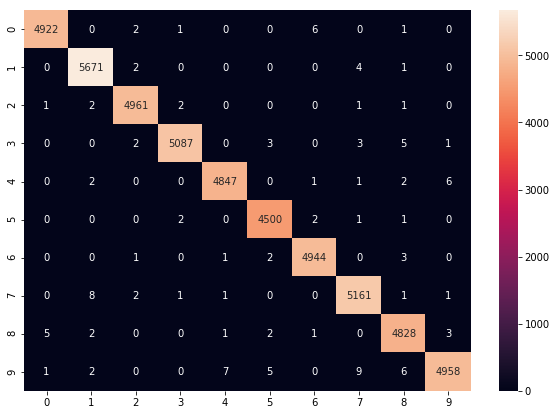

In [86]:
Y_train = Y_train.argmax(1)
cm=metrics.confusion_matrix(Y_train,Y_train_pred)
print("Confusion matrix for Training")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for Validation


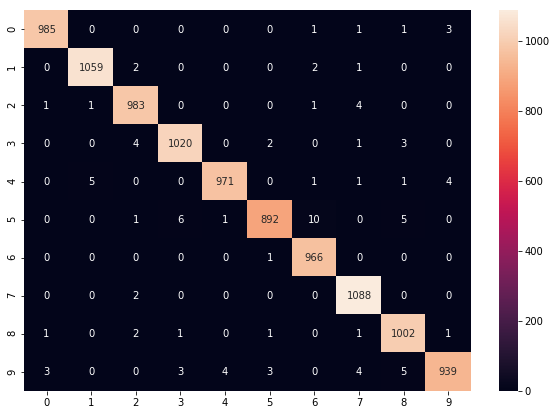

In [82]:
cm=metrics.confusion_matrix(Y_val,Y_val_pred)
print("\nConfusion matrix for Validation")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for Test


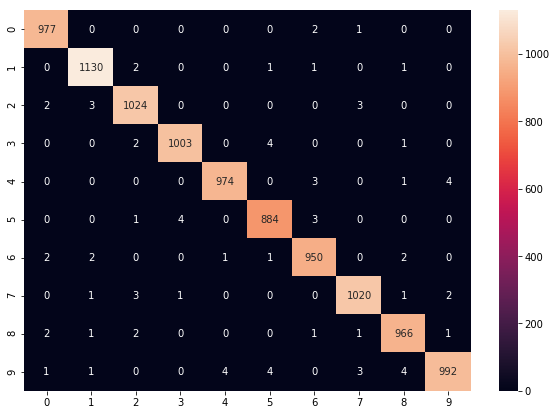

In [83]:
cm=metrics.confusion_matrix(Y_test,Y_test_pred1)
print("\nConfusion matrix for Test")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")


Confusion matrix for UPSPS


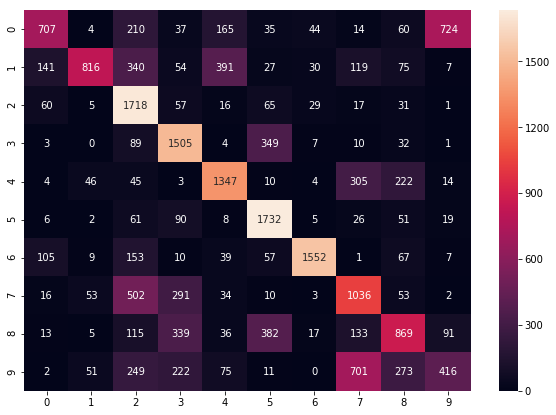

In [84]:
cm=metrics.confusion_matrix(UPSPS_target,UPSPS_pred)
print("\nConfusion matrix for UPSPS")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [49]:
np.savetxt('CNN_MNIST_Train.csv',Y_train_pred, delimiter=",")
np.savetxt('CNN_MNIST_Test.csv',Y_test_pred1, delimiter=",")
np.savetxt('CNN_MNIST_Val.csv',Y_val_pred, delimiter=",")
np.savetxt('CNN_MNIST_UPSPS.csv',UPSPS_pred, delimiter=",")

In [91]:
pwd

'/Users/abhavluthra/Desktop/ML-1_ST_SEM/Project 3/Ublearns'

In [93]:
Y_train

array([5, 0, 4, ..., 8, 4, 8])